## Genre network Construction

### Loading data and imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
import networkx as nx
import community as community_louvain

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
df = pd.read_csv('IMDB_movie_details.csv')
df.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis,title
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"['Action', 'Thriller']",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",Giochi di potere
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,['Comedy'],6.6,2013-11-01,Four boys around the age of 10 are friends in ...,Last Vegas
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"['Comedy', 'Romance']",6.7,2002-04-11,NaN,Wet Hot American Summer
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"['Adventure', 'Drama', 'Western']",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...,Il tesoro della Sierra Madre
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"['Comedy', 'Drama', 'Romance']",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...,Election


In [4]:
!pip install python-louvain

### Construct the network

In [5]:
G = nx.Graph()

# Add nodes with genre as attribute
for i, row in df.iterrows():
    genres = set(ast.literal_eval(row['genre']))
    if row['movie_id'] not in G:
        G.add_node(row['movie_id'], genre=list(genres))

# Add weighted edges based on genre similarity
for i, row_i in df.iterrows():
    for j, row_j in df.iterrows():
        if i < j:  # to avoid duplicating edges and self-loops
            genres_i = set(ast.literal_eval(row_i['genre']))
            genres_j = set(ast.literal_eval(row_j['genre']))
            intersection = genres_i & genres_j
            if intersection: 
                weight = len(intersection)  
                G.add_edge(row_i['movie_id'], row_j['movie_id'], weight=weight)


In [5]:
pos = nx.spring_layout(G, seed= 42)
nx.draw(G, with_labels=False, pos = pos)

In [ ]:
for node, attrs in G.nodes(data=True):
    for key, value in attrs.items():
        if isinstance(value, list):
            attrs[key] = str(value)

#Downloading the created graph
nx.write_graphml(G, "genre_graph.graphml")

In [ ]:
G.nodes(data = True)

NodeDataView({'tt0105112': {'genre': "['Thriller', 'Action']", 'community': 0}, 'tt1204975': {'genre': "['Comedy']", 'community': 1}, 'tt0243655': {'genre': "['Comedy', 'Romance']", 'community': 1}, 'tt0040897': {'genre': "['Adventure', 'Western', 'Drama']", 'community': 2}, 'tt0126886': {'genre': "['Drama', 'Comedy', 'Romance']", 'community': 1}, 'tt0286716': {'genre': "['Action', 'Sci-Fi']", 'community': 0}, 'tt0090605': {'genre': "['Adventure', 'Action', 'Sci-Fi']", 'community': 0}, 'tt0243155': {'genre': "['Drama', 'Comedy', 'Romance']", 'community': 1}, 'tt0121765': {'genre': "['Adventure', 'Action', 'Fantasy']", 'community': 0}, 'tt0443453': {'genre': "['Comedy']", 'community': 1}, 'tt0107131': {'genre': "['Adventure', 'Comedy', 'Drama']", 'community': 1}, 'tt0110364': {'genre': "['Sport', 'Comedy', 'Family']", 'community': 1}, 'tt0450259': {'genre': "['Adventure', 'Thriller', 'Drama']", 'community': 2}, 'tt0143145': {'genre': "['Adventure', 'Action', 'Thriller']", 'community': 0

## Genre network communities analysis

In [6]:
#Import the community network
G = nx.read_graphml("genre_graph.graphml")

In [7]:
G.nodes(data = True)

NodeDataView({'tt0105112': {'genre': "['Thriller', 'Action']", 'community': 0}, 'tt1204975': {'genre': "['Comedy']", 'community': 1}, 'tt0243655': {'genre': "['Comedy', 'Romance']", 'community': 1}, 'tt0040897': {'genre': "['Adventure', 'Western', 'Drama']", 'community': 2}, 'tt0126886': {'genre': "['Drama', 'Comedy', 'Romance']", 'community': 1}, 'tt0286716': {'genre': "['Action', 'Sci-Fi']", 'community': 0}, 'tt0090605': {'genre': "['Adventure', 'Action', 'Sci-Fi']", 'community': 0}, 'tt0243155': {'genre': "['Drama', 'Comedy', 'Romance']", 'community': 1}, 'tt0121765': {'genre': "['Adventure', 'Action', 'Fantasy']", 'community': 0}, 'tt0443453': {'genre': "['Comedy']", 'community': 1}, 'tt0107131': {'genre': "['Adventure', 'Comedy', 'Drama']", 'community': 1}, 'tt0110364': {'genre': "['Sport', 'Comedy', 'Family']", 'community': 1}, 'tt0450259': {'genre': "['Adventure', 'Thriller', 'Drama']", 'community': 2}, 'tt0143145': {'genre': "['Adventure', 'Action', 'Thriller']", 'community': 0

In [8]:
G.number_of_nodes()

1572

In [10]:
#Create communities with LOUVAIN

import community
from community import community_louvain

# Finding partition with Louvain algorithm
louvain_partition = community_louvain.best_partition(G, weight='weight', random_state=42)

# Adding partition information as a node attribute
nx.set_node_attributes(G, louvain_partition, 'community')

G.nodes(data = True)

NodeDataView({'tt0105112': {'genre': "['Thriller', 'Action']", 'community': 0}, 'tt1204975': {'genre': "['Comedy']", 'community': 1}, 'tt0243655': {'genre': "['Comedy', 'Romance']", 'community': 1}, 'tt0040897': {'genre': "['Adventure', 'Western', 'Drama']", 'community': 2}, 'tt0126886': {'genre': "['Drama', 'Comedy', 'Romance']", 'community': 1}, 'tt0286716': {'genre': "['Action', 'Sci-Fi']", 'community': 0}, 'tt0090605': {'genre': "['Adventure', 'Action', 'Sci-Fi']", 'community': 0}, 'tt0243155': {'genre': "['Drama', 'Comedy', 'Romance']", 'community': 1}, 'tt0121765': {'genre': "['Adventure', 'Action', 'Fantasy']", 'community': 0}, 'tt0443453': {'genre': "['Comedy']", 'community': 1}, 'tt0107131': {'genre': "['Adventure', 'Comedy', 'Drama']", 'community': 1}, 'tt0110364': {'genre': "['Sport', 'Comedy', 'Family']", 'community': 1}, 'tt0450259': {'genre': "['Adventure', 'Thriller', 'Drama']", 'community': 2}, 'tt0143145': {'genre': "['Adventure', 'Action', 'Thriller']", 'community': 0

In [11]:
communities_genre = pd.DataFrame(data = louvain_partition.items(), columns=['movie_id', 'community'])
communities_genre.head()

,movie_id,community
0,tt0105112,0
1,tt1204975,1
2,tt0243655,1
3,tt0040897,2
4,tt0126886,1


(-0.47538682505488394,
 1.1401951281726361,
 -0.41082036733627325,
 0.4176225090026856)

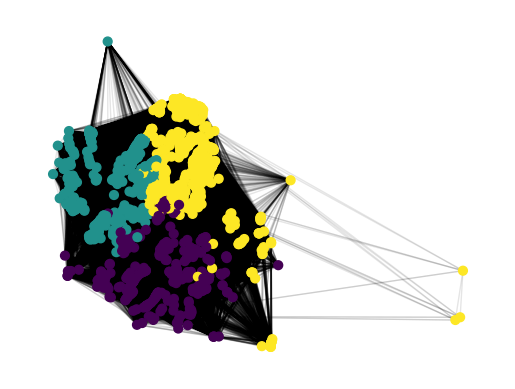

In [12]:
# Drawing the graph with the detected communities

import matplotlib.pyplot as plt

pos = nx.spring_layout(G, seed= 42 ) 
cmap = plt.get_cmap('viridis')
nx.draw_networkx_nodes(G, pos, louvain_partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(louvain_partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.axis('off')

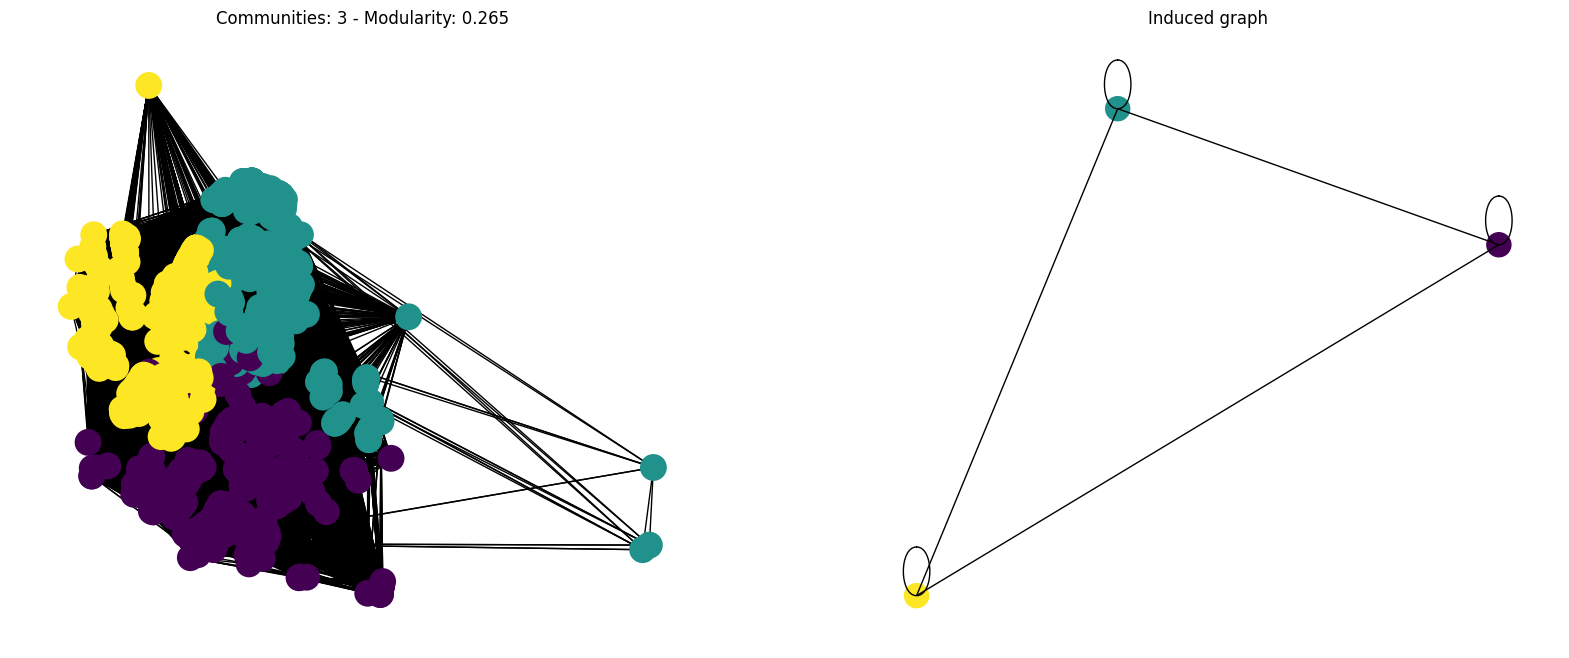

In [13]:
dendro = community_louvain.generate_dendrogram(G, weight = 'weigth', random_state = 42)

fig, axes = plt.subplots(len(dendro),2, figsize = (20,8*len(dendro)))

for level in range(len(dendro)):
    part = community_louvain.partition_at_level(dendro, level)
    mod_level = community_louvain.modularity(part, G, weight='weight')

    nx.draw_networkx_nodes(G,
                           pos,
                           node_color=list(part.values()),
                           linewidths=2,
                           cmap=cmap,
                           ax=(axes[level, 0] if len(dendro) > 1 else axes[0]))
    nx.draw_networkx_edges(G,
                           pos,
                           ax=(axes[level, 0] if len(dendro) > 1 else axes[0]))
    ax = (axes[level, 0] if len(dendro) > 1 else axes[0])
    ax.set_title(f"Communities: {len(set(part.values()))} - Modularity: {round(mod_level, 3)}")
    ax.axis('off')
    # Induced graph
    ind = community_louvain.induced_graph(part, G)
    pos_ind = nx.spring_layout(ind, seed=20)
    no = nx.draw_networkx_nodes(ind,
                                pos=pos_ind,
                                node_color=pd.Series(part).drop_duplicates().values,
                                cmap=cmap,
                                ax=(axes[level, 1] if len(dendro) > 1 else axes[1]))
    ed = nx.draw_networkx_edges(ind,
                                pos=pos_ind,
                                ax=(axes[level, 1] if len(dendro) > 1 else axes[1]))

    no.set_zorder(1)
    ax = (axes[level, 1] if len(dendro) > 1 else axes[1])
    ax.set_title("Induced graph")
    ax.axis('off')

plt.show()

## Semantic similarity network communities analysis




In [15]:
#Loading semantic network
G_0 = nx.read_graphml('synopsis_graph_final.graphml')

In [16]:
#Creating communities with LOUVAIN
import community
from community import community_louvain

louvain_partition0 = community_louvain.best_partition(G_0, weight='weight', random_state=42)
nx.set_node_attributes(G_0, louvain_partition0, 'community')

G_0.nodes(data = True)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
communities_semantic = pd.DataFrame(data = louvain_partition0.items(), columns=['node_id', 'community'])
communities_semantic.head()

,node_id,community
0,0,0
1,56,1
2,90,3
3,94,3
4,151,1


In [19]:
def add_movie_ids(df, graph):
    def get_movie_id(node_id):
        # Trying to get the 'movie_id' attribute. We return None if not found
        return graph.nodes[node_id].get('movie_id', None)
    
    df['movie_id'] = df['node_id'].apply(get_movie_id)

    return df

In [20]:
communities_semantic = add_movie_ids(communities_semantic, G_0)
communities_semantic.head()

,node_id,community,movie_id
0,0,0,tt0105112
1,56,1,tt0406375
2,90,3,tt0324216
3,94,3,tt0129290
4,151,1,tt0398808


(-1.1333470940589905,
 0.9759939312934875,
 -1.202139201760292,
 1.1272744566202164)

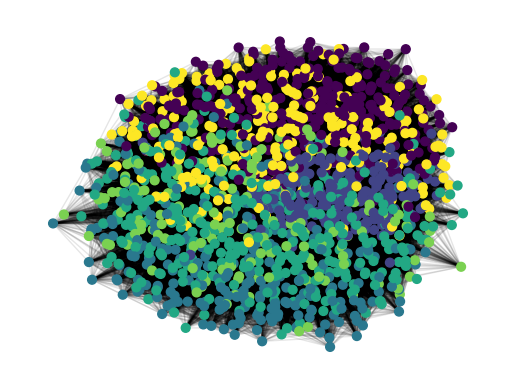

In [21]:
#Plot the network
import matplotlib.pyplot as plt

pos = nx.spring_layout(G_0, seed= 42 )  
cmap = plt.get_cmap('viridis')
nx.draw_networkx_nodes(G_0, pos, louvain_partition0.keys(), node_size=40,
                       cmap=cmap, node_color=list(louvain_partition0.values()))
nx.draw_networkx_edges(G_0, pos, alpha=0.1)
plt.axis('off')

(-1.1333470940589905,
 0.9759939312934875,
 -1.202139201760292,
 1.1272744566202164)

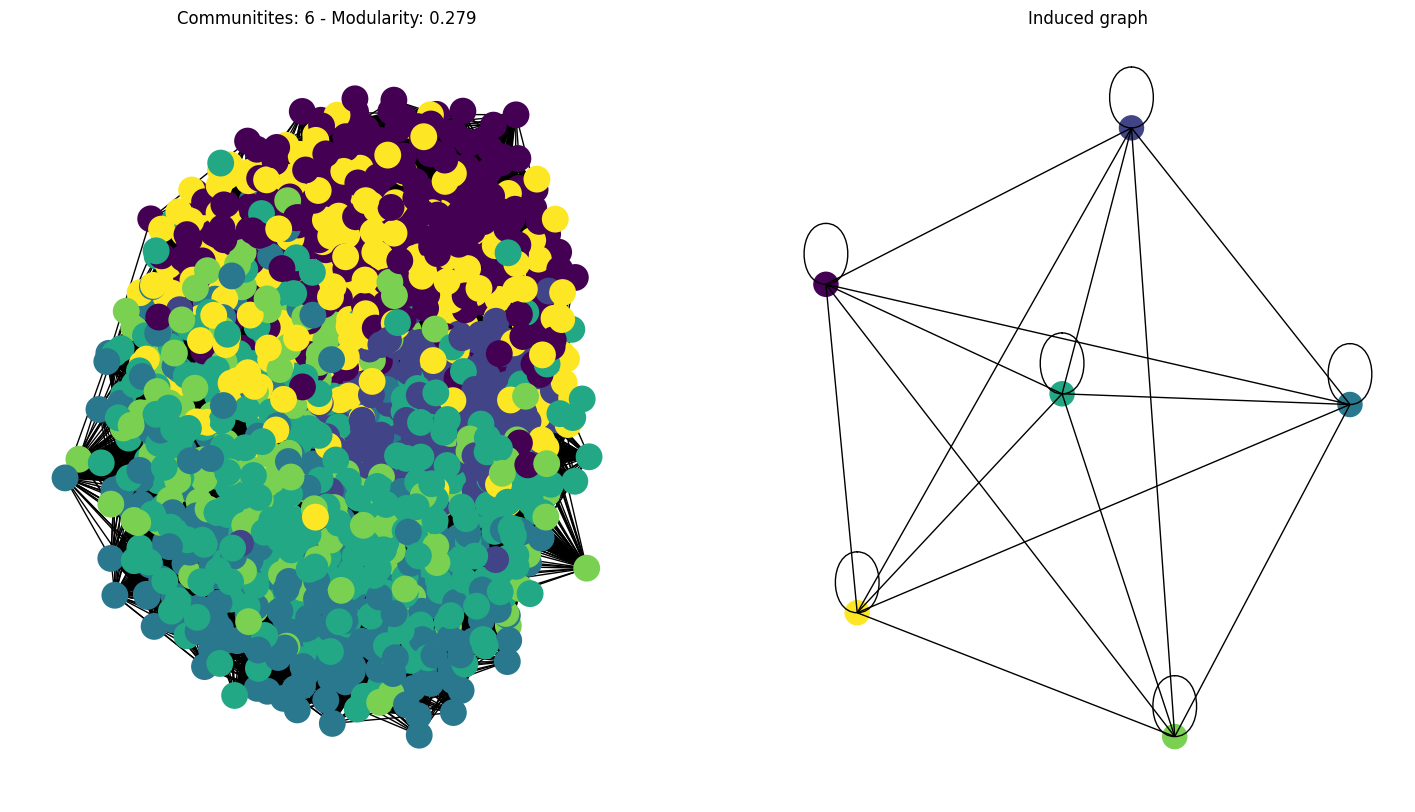

In [29]:
fig, axes = plt.subplots(1,2, figsize = (18,10))

nx.draw_networkx_nodes(G_0,
                        pos,
                        node_color= list(louvain_partition0.values()),
                        linewidths= 2,
                        cmap=cmap,
                        ax = axes[0])
nx.draw_networkx_edges(G_0,
                        pos,
                        ax = axes[0])

axes[0].set_title(f"Communitites: {len(set(louvain_partition0.values()))} - Modularity: {round(Q, 3)}")

# induced graph
ind = community_louvain.induced_graph(louvain_partition0, G_0)

pos_ind = nx.spring_layout(ind, seed = 20)
no = nx.draw_networkx_nodes(ind,
                node_color = pd.Series(louvain_partition0).drop_duplicates().values,
                cmap=cmap,
                pos= pos_ind, ax =axes[1])
ed = nx.draw_networkx_edges(ind,
                pos = pos_ind,
                ax = axes[1])

# Getting edge weights
edge_weights = nx.get_edge_attributes(G_0, 'weight')
rounded_edge_weights = {edge: round(weight, 1) for edge, weight in edge_weights.items()}
no.set_zorder(1)
axes[1].set_title(f"Induced graph")

axes[1].axis('off')
axes[0].axis('off')


## Compare metrics

In [30]:
# Number of connected components
print("Connected components Semantic network: ", nx.number_connected_components(G_0))
print("Connected components Genre network: ", nx.number_connected_components(G))

Connected components Semantic network:  1
Connected components Genre network:  1


In [31]:
# Compare modularity
print('Modularity Semantic network:', community_louvain.modularity(louvain_partition0, G_0, weight = 'weight'))
print('Modularity Genre network:', community_louvain.modularity(louvain_partition, G, weight = 'weight'))

Modularity Semantic network: 0.2792661326483085
Modularity Genre network: 0.2686847492494545


In [34]:
# Store communities
communities_genre.to_csv("communities_genre.csv")
communities_semantic.to_csv("communities_semantic.csv")

We then compare the two clusterings through 3 metrics:

### NMI normalized mutual information

NMI normalized mutual information: the amount of information obtained from one partition about the other. This process provide us a normalized metric that indicates the level of information shared between the two community assignments, giving insights into how similar or diverse the groupings are based on different perspectives or attributes.

In [43]:
import pandas as pd
from sklearn.metrics import normalized_mutual_info_score

In [44]:
# Calculating Normalized Mutual Information
nmi_score = normalized_mutual_info_score(merged_df['community_genre'], merged_df['community_semantic'])
print("Normalized Mutual Information (NMI):", nmi_score)

Normalized Mutual Information (NMI): 0.08126890860871595


### Jaccard index

Jaccard index: compare similarity and diversity of the sets, intersection/union. We use the Jaccard Index to assess the similarity between the sets of nodes in the same community across two different partitions (e.g., communities_genre and communities_semantic). This is useful for us to understand how closely these classifications align or diverge from each other.

In [46]:
def jaccard_similarity(list1, list2):
    intersection = len(set(list1).intersection(list2))
    union = len(set(list1).union(list2))
    return intersection / union

In [47]:
genre_communities = {}
semantic_communities = {}

for community, data in merged_df.groupby('community_genre'):
    genre_communities[community] = set(data['movie_id'])

for community, data in merged_df.groupby('community_semantic'):
    semantic_communities[community] = set(data['movie_id'])

# Calculating Jaccard Index
for g_key in genre_communities:
    for s_key in semantic_communities:
        jaccard_index = jaccard_similarity(genre_communities[g_key], semantic_communities[s_key])
        print(f"Jaccard Index between genre community {g_key} and semantic community {s_key}: {jaccard_index:.4f}")

Jaccard Index between genre community 0 and semantic community 0: 0.0270
Jaccard Index between genre community 0 and semantic community 1: 0.0459
Jaccard Index between genre community 0 and semantic community 2: 0.2985
Jaccard Index between genre community 0 and semantic community 3: 0.1406
Jaccard Index between genre community 0 and semantic community 4: 0.1448
Jaccard Index between genre community 0 and semantic community 5: 0.0692
Jaccard Index between genre community 1 and semantic community 0: 0.2567
Jaccard Index between genre community 1 and semantic community 1: 0.1722
Jaccard Index between genre community 1 and semantic community 2: 0.0343
Jaccard Index between genre community 1 and semantic community 3: 0.0876
Jaccard Index between genre community 1 and semantic community 4: 0.0480
Jaccard Index between genre community 1 and semantic community 5: 0.1541
Jaccard Index between genre community 2 and semantic community 0: 0.1464
Jaccard Index between genre community 2 and semanti

### Variation of information

We use the Variation of Information (VI) to quantify the amount of information lost and gained in changing from one clustering to another. This metric is useful in comparing clusterings as it measures the distance between two partitions: the lower the VI, the more similar the clusterings are.

In [50]:
import pandas as pd
from sklearn.metrics import mutual_info_score
import numpy as np


In [51]:
def entropy(labels):
    #Computing entropy
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    counts = np.bincount(labels)
    probs = counts[counts > 0] / n_labels
    n_classes = np.count_nonzero(counts)

    if n_classes <= 1:
        return 0

    return -np.sum(probs * np.log(probs))

def variation_of_information(X, Y):
    #Computing VI between the two clusterings
    total_entropy_x = entropy(X)
    total_entropy_y = entropy(Y)
    mutual_info = mutual_info_score(X, Y)

    return total_entropy_x + total_entropy_y - 2 * mutual_info


In [ ]:
# We sort the data frames by node_id to ensure alignment
communities_genre = communities_genre.sort_values(by='movie_id')
communities_semantic = communities_semantic.sort_values(by='movie_id')
merged_df = pd.merge(communities_genre, communities_semantic, on='movie_id', suffixes=('_genre', '_semantic'))

#`merged_df` contains both community labels for each node_id that exists in both original DataFrames
print(merged_df)

In [52]:
vi_score = variation_of_information(X=merged_df['community_genre'], Y=merged_df['community_semantic'])
print("Variation of Information (VI):", vi_score)

Variation of Information (VI): 2.6104240629886024
